In [1]:
import math as m

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
from scipy import special
from pylab import *
%matplotlib inline

from src import billiardClass as bc
from src import curveClass as cv
from src import plottingFunctions as pf
#from src import verginiSaraceno as vs
#from src import planeWaveDecomposition as pwd

In [2]:
# line
def line_r(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    x = (x1-x0) * t + x0 
    y = (y1-y0) * t + y0
    return x, y

def line_n(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    nx = (y1 - y0)/l
    ny = (x0 - x1)/l
    return nx, ny

def line_arc(t, x0 = 0, y0 = 0, x1 = 1, y1 = 1):
    l = np.sqrt((x1 - x0)**2 + (y1 -y0)**2)
    return t * l

# circle arc
def circle_r(t, R = 1, x0 = 0, y0 = 0, angle = 2*np.pi, shift = 0):
    x = x0 + R * np.cos(t*angle + shift)
    y = y0 + R * np.sin(t*angle + shift)
    return x, y

def circle_n(t, angle = 2*np.pi, shift = 0, **kwargs):
    nx = np.cos(t*angle + shift)
    ny = np.sin(t*angle + shift)
    return nx, ny

def circle_arc(t, R = 1, angle = 2*np.pi, **kwargs):
    return  R * angle *t

In [3]:
params = {}
circle = cv.curve(circle_r, circle_n, circle_arc)

In [4]:
circleBilliard = bc.billiard([circle], np.pi, point_densities=[10])

In [5]:
k0 = 2.4
dk = 0.05
N = 200
circleBilliard.scaling_eigenvalues(N, k0, dk)

array([2.40482075])

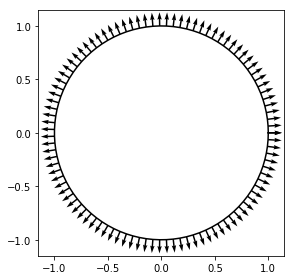

In [6]:
pf.plot_boundary(circleBilliard, M =10)

In [7]:
k0 = 2.4
dk = 0.05
N = 200
circleBilliard.scaling_eigenvalues(N, k0, dk)

array([2.40482075])

In [8]:
k0 = 2.4
dk = 0.05
N = 200
circleBilliard.PWD_eigenvalue(N, k0, dk)

     fun: 1.583053413596672e-11
 message: 'Solution found.'
    nfev: 8
  status: 0
 success: True
       x: 2.4048243877930613

In [9]:
special.jn_zeros(0,1)

array([2.40482556])

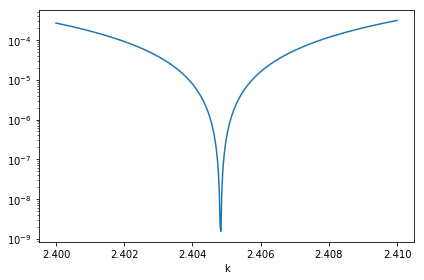

In [10]:
pf.plot_tension(circleBilliard, 2.4, 2.41, grid = 400)

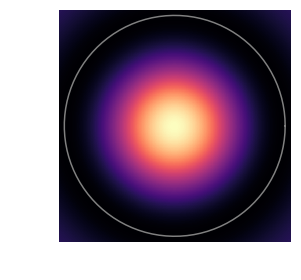

In [11]:
pf.plot_probability(circleBilliard, 2.4048243877930671)

In [13]:
params_1 = {"angle" : np.pi/2}
arc_1 = cv.curve(circle_r, circle_n, circle_arc, **params_1)
params_2 = {"x0": 0, "x1": -1, "y0": 1, "y1": 0}
line_2 = cv.curve(line_r, line_n, line_arc, **params_2)
params_3 = {"x0": -1, "x1": -1, "y0": 0, "y1": -1}
line_3 = cv.curve(line_r, line_n, line_arc, **params_3)
params_4 = {"x0": -1, "x1": 0.5, "y0": -1, "y1": -1}
line_4 = cv.curve(line_r, line_n, line_arc, **params_4)
params_5 = {"R" : 0.5, "x0": 0.5, "y0" : -0.5 , "angle" : np.pi/2, "shift" : 3*np.pi/2}
arc_5 = cv.curve(circle_r, circle_n, circle_arc, **params_5)
params_6 = {"x0": 1, "x1": 1, "y0": -0.5, "y1": 0}
line_6 = cv.curve(line_r, line_n, line_arc, **params_6)

curves = [arc_1, line_2, line_3, line_4, arc_5, line_6]
area = np.pi/4 + 1/2 + 1.5 + np.pi *0.5**2 + 0.5**2
dens = [15 for i in curves]
dens[1] = 20


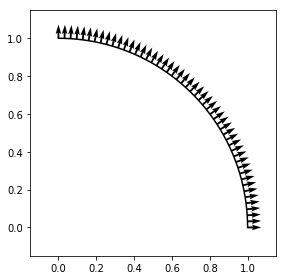

In [14]:
pf.plot_curve(arc_1)

In [15]:
weirdBilliard = bc.billiard(curves, area, point_densities= dens)

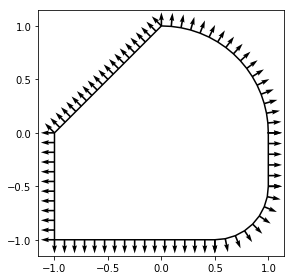

In [16]:
pf.plot_boundary(weirdBilliard , M =5)

In [17]:
bnd_x, bnd_y, normal_x, normal_y, bnd_s = weirdBilliard.evaluate_boundary(np.pi)

In [18]:
bnd_s

array([0.        , 0.14279967, 0.28559933, 0.428399  , 0.57119866,
       0.71399833, 0.856798  , 0.99959766, 1.14239733, 1.28519699,
       1.42799666, 1.57079633, 1.57079633, 1.67181158, 1.77282684,
       1.87384209, 1.97485734, 2.0758726 , 2.17688785, 2.27790311,
       2.37891836, 2.47993362, 2.58094887, 2.68196413, 2.78297938,
       2.88399463, 2.98500989, 2.98500989, 3.12786703, 3.27072417,
       3.41358132, 3.55643846, 3.6992956 , 3.84215275, 3.98500989,
       3.98500989, 4.12137353, 4.25773716, 4.3941008 , 4.53046443,
       4.66682807, 4.80319171, 4.93955534, 5.07591898, 5.21228262,
       5.34864625, 5.48500989, 5.48500989, 5.64208952, 5.79916915,
       5.95624879, 6.11332842, 6.27040805, 6.27040805, 6.43707472,
       6.60374139, 6.77040805])

In [20]:
k0 = 2.4
dk = 0.05
N = 200
VSresult = weirdBilliard.scaling_eigenvalues(N, k0, dk)
print(VSresult)

[2.44843146]


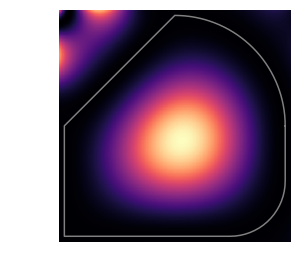

In [21]:
pf.plot_probability(weirdBilliard, VSresult[0])

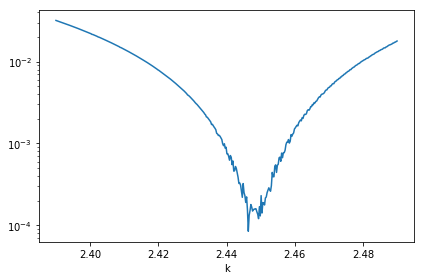

In [22]:
k0 = 2.44
dk = 0.05
pf.plot_tension(weirdBilliard, k0 -dk, k0+dk, N = 200, grid = 400)

In [23]:
k0 = 2.4
dk = 0.05
N = 200
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)

     fun: 0.00016391520958450076
 message: 'Solution found.'
    nfev: 15
  status: 0
 success: True
       x: 2.446206463992902


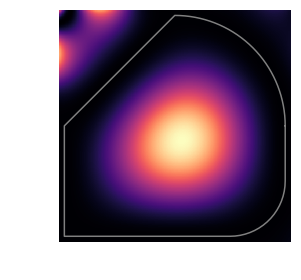

In [24]:
pf.plot_probability(weirdBilliard, PWDresult.x)

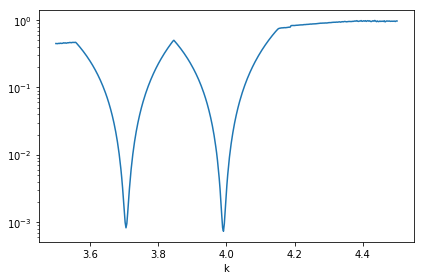

In [25]:
k1 = 3.5
k2 = 4.5
pf.plot_tension(weirdBilliard, k1, k2, N = 200, grid = 400)

     fun: 0.0008116203873370928
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 3.7046811313654313


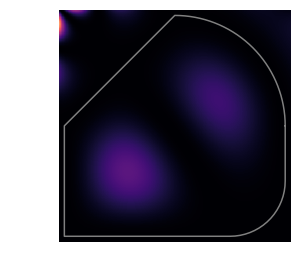

In [26]:
k0 = 3.7
dk = 0.25
N = 500
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)
pf.plot_probability(weirdBilliard, PWDresult.x)

     fun: 0.0006729602641724971
 message: 'Solution found.'
    nfev: 21
  status: 0
 success: True
       x: 3.9906258319203674


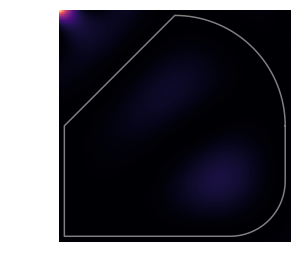

In [27]:
k0 = 4
dk = 0.25
N = 500
PWDresult = weirdBilliard.PWD_eigenvalue(N, k0, dk)
print(PWDresult)
pf.plot_probability(weirdBilliard, PWDresult.x)